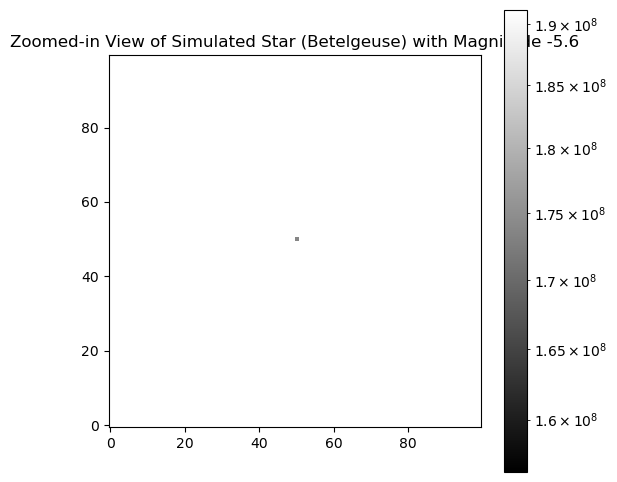

In [17]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Function to simulate a point star in a FITS file
def simulate_star_fits(magnitude, filename='star_simulation.fits'):
    # Define the size of the image
    size = 1000
    # Create an empty image array
    image_data = np.zeros((size, size))

    # Calculate the center of the image
    center = size // 2

    # Normalize the magnitude to use it for point brightness
    # Arbitrary scaling for the simulation
    brightness = 10 ** ((-magnitude + 5) / 2.5) * 1e4  # Adjust the factor for visibility

    # Place the star at the center of the image
    image_data[center, center] = brightness

    # Create a FITS PrimaryHDU object
    hdu = fits.PrimaryHDU(image_data)

    # Write the FITS file
    hdu.writeto(filename, overwrite=True)
    return filename

# Simulate Betelgeuse with an apparent magnitude of -5.6
filename = simulate_star_fits(-5.6)

# Load the FITS file to display
hdu_list = fits.open(filename)
image_data = hdu_list[0].data

# Define zoom region (around the center of the image)
zoom_size = 100  # Size of the zoom region
center = image_data.shape[0] // 2
zoom_region = image_data[center - zoom_size // 2:center + zoom_size // 2, center - zoom_size // 2:center + zoom_size // 2]

# Display the zoomed-in image data
plt.figure(figsize=(6, 6))
plt.imshow(zoom_region, cmap='gray', origin='lower', norm=LogNorm())
plt.colorbar()
plt.title('Zoomed-in View of Simulated Star (Betelgeuse) with Magnitude -5.6')
plt.show()


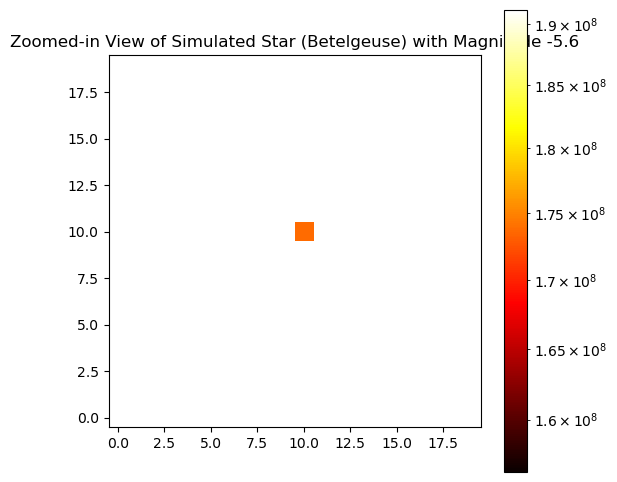

In [19]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Function to simulate a point star in a FITS file and display a zoomed-in region
def simulate_star_fits(magnitude, zoom_size=50, filename='star_simulation.fits'):
    # Define the size of the image
    size = 1000
    # Create an empty image array
    image_data = np.zeros((size, size))

    # Calculate the center of the image
    center = size // 2

    # Normalize the magnitude to use it for point brightness
    # Arbitrary scaling for the simulation
    brightness = 10 ** ((-magnitude + 5) / 2.5) * 1e4  # Adjust the factor for visibility

    # Place the star at the center of the image
    image_data[center, center] = brightness

    # Create a FITS PrimaryHDU object
    hdu = fits.PrimaryHDU(image_data)

    # Write the FITS file
    hdu.writeto(filename, overwrite=True)
    
    # Load the FITS file to display
    hdu_list = fits.open(filename)
    image_data = hdu_list[0].data

    # Define zoom region (around the center of the image)
    zoom_region = image_data[center - zoom_size // 2:center + zoom_size // 2, center - zoom_size // 2:center + zoom_size // 2]

    # Display the zoomed-in image data
    plt.figure(figsize=(6, 6))
    plt.imshow(zoom_region, cmap='hot', origin='lower', norm=LogNorm())
    plt.colorbar()
    plt.title(f'Zoomed-in View of Simulated Star (Betelgeuse) with Magnitude {magnitude}')
    plt.show()

# Simulate Betelgeuse with an apparent magnitude of -5.6 and a zoom region of 20
simulate_star_fits(-5.6, zoom_size=20)


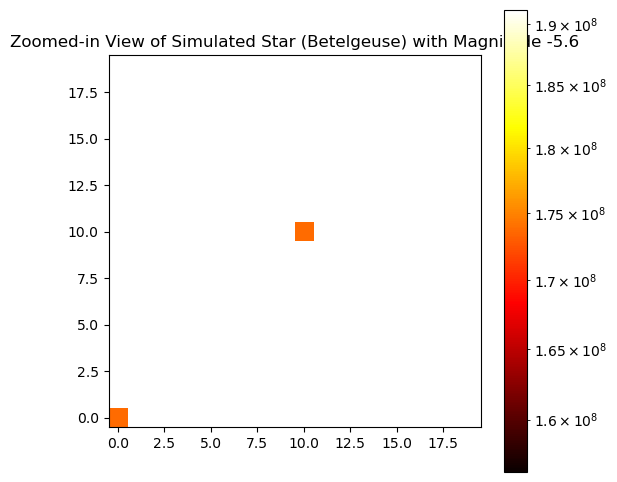

In [21]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Function to simulate a point star in a FITS file and display a zoomed-in region
def simulate_star_fits(magnitude, zoom_size=50, filename='gridsim.fits'):
    # Define the size of the image
    size = 1000
    # Create an empty image array
    image_data = np.zeros((size, size))

    # Calculate the center of the image
    center = size // 2

    # Normalize the magnitude to use it for point brightness
    # Arbitrary scaling for the simulation
    brightness = 10 ** ((-magnitude + 5) / 2.5) * 1e4  # Adjust the factor for visibility

    # Place the star at the center of the image
    image_data[center, center] = brightness
    image_data[center-10, center-10] = brightness
    # Create a FITS PrimaryHDU object
    hdu = fits.PrimaryHDU(image_data)

    # Write the FITS file
    hdu.writeto(filename, overwrite=True)
    
    # Load the FITS file to display
    hdu_list = fits.open(filename)
    image_data = hdu_list[0].data

    # Define zoom region (around the center of the image)
    zoom_region = image_data[center - zoom_size // 2:center + zoom_size // 2, center - zoom_size // 2:center + zoom_size // 2]

    # Display the zoomed-in image data
    plt.figure(figsize=(6, 6))
    plt.imshow(zoom_region, cmap='hot', origin='lower', norm=LogNorm())
    plt.colorbar()
    plt.title(f'Zoomed-in View of Simulated Star (Betelgeuse) with Magnitude {magnitude}')
    plt.show()

# Simulate Betelgeuse with an apparent magnitude of -5.6 and a zoom region of 20
simulate_star_fits(-5.6, zoom_size=20)


In [2]:
import pyxel
config = pyxel.load("point_source.yaml")

exposure = config.exposure
detector = config.detector
pipeline = config.pipeline

result = pyxel.run_mode(
    mode=exposure,
    detector=detector,
    pipeline=pipeline,
)

result

Readout time:   0%|          | 0/3 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.11/site-packages/pyxel/pipelines/model_group.py:90: UserWarning: Trying to set negative values in the Photon array! Negative values clipped to 0.
  model(detector)
/opt/anaconda3/lib/python3.11/site-packages/pyxel/pipelines/model_group.py:90: UserWarning: Trying to set negative values in the Photon array! Negative values clipped to 0.
  model(detector)


DataTree('None', parent=None)
│   Dimensions:  (time: 3, y: 450, x: 450)
│   Coordinates:
│     * time     (time) float64 24B 1.0 5.0 7.0
│     * y        (y) int64 4kB 0 1 2 3 4 5 6 7 8 ... 442 443 444 445 446 447 448 449
│     * x        (x) int64 4kB 0 1 2 3 4 5 6 7 8 ... 442 443 444 445 446 447 448 449
│   Data variables:
│       photon   (time, y, x) float64 5MB 0.0002547 0.000172 ... 0.000344 0.0005094
│       charge   (time, y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
│       pixel    (time, y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
│       signal   (time, y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
│       image    (time, y, x) uint16 1MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
│   Attributes:
│       pyxel version:  2.0
│       running mode:   Exposure
├── DataTree('scene')
└── DataTree('data')

In [5]:
pyxel.display_detector(detector)

BokehModel(combine_events=True, render_bundle={'docs_json': {'5cdc40b4-31a6-43e3-a93b-911c99972203': {'version…

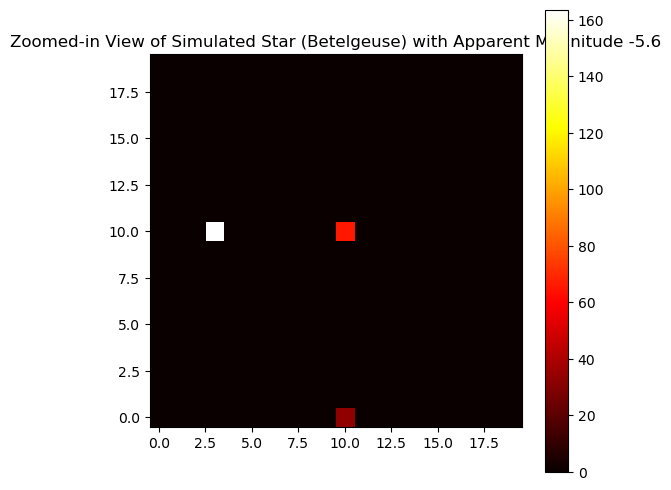

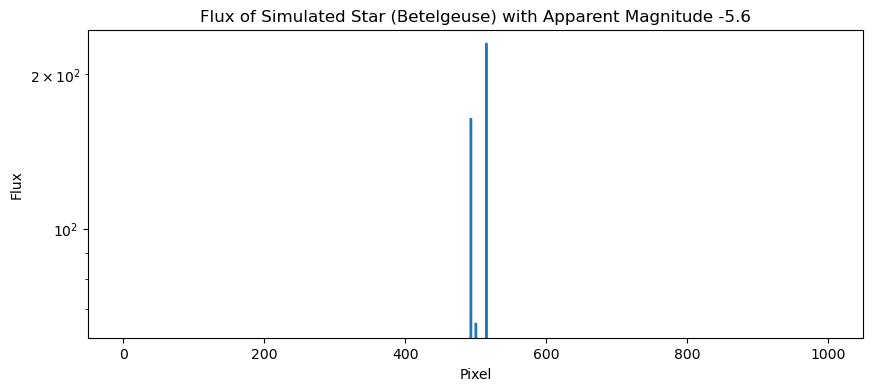

In [15]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Function to simulate a point star in a FITS file and display a zoomed-in region
def simulate_star_fits(apparent_magnitude, absolute_magnitude, distance, zoom_size=50, filename='grid_simulation.fits'):
    # Define the size of the image
    size = 1000
    # Create an empty image array
    image_data = np.zeros((size, size))

    # Calculate the center of the image
    center = size // 2
    lower = center - 10
    upper = center + 10

    # Calculate the brightness using the distance modulus formula
    brightness = 10 ** ((apparent_magnitude - absolute_magnitude + 5) / 2.5)

    # Place the star at the center of the image
    image_data[center, center] = brightness

    image_data[lower, center] = brightness*0.5
    image_data[upper, center] = brightness*1.5
    image_data[center, lower+3] = brightness*2.5
    image_data[center, upper+5] = brightness*3.5

    # run a loop to create a grid of stars
        
    # Create a FITS PrimaryHDU object
    hdu = fits.PrimaryHDU(image_data)

    # Write the FITS file
    hdu.writeto(filename, overwrite=True)
    
    # Load the FITS file to display
    hdu_list = fits.open(filename)
    image_data = hdu_list[0].data

    # Define zoom region (around the center of the image)
    zoom_region = image_data[center - zoom_size // 2:center + zoom_size // 2, center - zoom_size // 2:center + zoom_size // 2]

    # Display the zoomed-in image data
    plt.figure(figsize=(6, 6))
    plt.imshow(zoom_region, cmap='hot', origin='lower')
    plt.colorbar()
    plt.title(f'Zoomed-in View of Simulated Star (Betelgeuse) with Apparent Magnitude {apparent_magnitude}')
    plt.show()
    
    return image_data, center

# Constants for Betelgeuse
apparent_magnitude = -5.6  # Apparent magnitude of Betelgeuse
absolute_magnitude = -5.14  # Approximate absolute magnitude of Betelgeuse
distance = 200  # Approximate distance to Betelgeuse in parsecs

# Simulate Betelgeuse and a zoom region of 20
image_data, center = simulate_star_fits(apparent_magnitude, absolute_magnitude, distance, zoom_size=20)

# Plot the flux of the star
plt.figure(figsize=(10, 4))
flux = image_data[center, :]
plt.plot(flux, drawstyle='steps-mid')
plt.yscale('log')
plt.xlabel('Pixel')
plt.ylabel('Flux')
plt.title('Flux of Simulated Star (Betelgeuse) with Apparent Magnitude -5.6')
plt.show()


In [8]:
import pyxel
config = pyxel.load("grid.yaml")

exposure = config.exposure
detector = config.detector
pipeline = config.pipeline

result = pyxel.run_mode(
    mode=exposure,
    detector=detector,
    pipeline=pipeline,
)

result

Readout time:   0%|          | 0/3 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.11/site-packages/pyxel/pipelines/model_group.py:90: UserWarning: Trying to set negative values in the Photon array! Negative values clipped to 0.
  model(detector)
/opt/anaconda3/lib/python3.11/site-packages/pyxel/pipelines/model_group.py:90: UserWarning: Trying to set negative values in the Photon array! Negative values clipped to 0.
  model(detector)


DataTree('None', parent=None)
│   Dimensions:  (time: 3, y: 450, x: 450)
│   Coordinates:
│     * time     (time) float64 24B 1.0 5.0 7.0
│     * y        (y) int64 4kB 0 1 2 3 4 5 6 7 8 ... 442 443 444 445 446 447 448 449
│     * x        (x) int64 4kB 0 1 2 3 4 5 6 7 8 ... 442 443 444 445 446 447 448 449
│   Data variables:
│       photon   (time, y, x) float64 5MB 0.002292 0.001548 ... 0.003096 0.004585
│       charge   (time, y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
│       pixel    (time, y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
│       signal   (time, y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
│       image    (time, y, x) uint16 1MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
│   Attributes:
│       pyxel version:  2.0
│       running mode:   Exposure
├── DataTree('scene')
└── DataTree('data')

In [9]:
pyxel.display_detector(detector)

BokehModel(combine_events=True, render_bundle={'docs_json': {'11541b2e-7d6a-4cf7-9dd5-e166a688c046': {'version…

Number of detected peaks: 25
Isolated peak 1: [4.52398462e-15 3.65470979e-15 3.88854544e-15 3.70379825e-15
 4.87498367e-15 5.77254678e-15 3.21422795e-15]
Isolated peak 2: [4.52398462e-15 3.65470979e-15 3.88854544e-15 3.70379825e-15
 4.87498367e-15 5.77254678e-15 3.21422795e-15 2.00198819e-15
 2.35199871e-15 2.37799564e-15]
Isolated peak 3: [3.21422795e-15 2.00198819e-15 2.35199871e-15 2.37799564e-15
 4.52407650e-15 5.36764239e-15 2.90545245e-15 4.40071478e-15
 1.03512579e-14 5.07433930e-15]
Isolated peak 4: [2.37799564e-15 4.52407650e-15 5.36764239e-15 2.90545245e-15
 4.40071478e-15 1.03512579e-14 5.07433930e-15 3.32085213e-15
 2.56213576e-15 4.47576880e-15]
Isolated peak 5: [4.40071478e-15 1.03512579e-14 5.07433930e-15 3.32085213e-15
 2.56213576e-15 4.47576880e-15 2.99220114e-15 5.64119727e-15
 3.64869018e-15 3.02454205e-15]
Isolated peak 6: [5.07433930e-15 3.32085213e-15 2.56213576e-15 4.47576880e-15
 2.99220114e-15 5.64119727e-15 3.64869018e-15 3.02454205e-15
 1.91502224e-15 2.87082